In [1]:
import json
import math
import random
import time

In [2]:
from collections import deque
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [3]:
def distance(coord1, coord2):
	"""
	Distance function.
	:param coord1: first point's coordinate 
	:param coord2: second point's coordinate
	:return: The Euclidean distance.
	"""
	import math
	x1, y1 = coord1
	x2, y2 = coord2
	return math.sqrt((x1-x2)**2 + (y1-y2)**2)
	

In [4]:
class TSP:
	
	def __init__(self, city_list, shuffle=False):
		if shuffle:
			city_list = list(city_list)
			import random
			random.shuffle(city_list)
		self.path = tuple(city_list)
		self._utility = None
		
	def copy(self, shuffle=False):
		city_list = list(self.path)
		if shuffle:
			random.shuffle(city_list)
			return TSP(city_list)
		
	@property
	def city_names(self):
		city_names, _ = zip(*self.path)
		return city_names
	
	@property
	def coordinates(self):
		_, coordinates = zip(*self.path)
		return coordinates
	
	@property
	def utility(self):
		if self._utility is None:
			self._utility = self._total_distance() * (-1)
		return self._utility
	
	def successors(self):
		num_cities = len(self.path)
		successor_list = []
		for city1_index in range(num_cities-1):
			for city2_index in range(city1_index + 1, num_cities):
				successor = list(self.path)
				successor[city1_index], successor[city2_index] = successor[city2_index], successor[city1_index]
				successor_list.append(successor)
		problem_list = []
		for successor_path in successor_list:
			problem_list.append(TSP(successor_path))
		return problem_list
	
	def get_successor(self):
		# get two different random indices
		num_cities = len(self.path)
		city1_index = 0
		city2_index = 0
		import random
		while city1_index == city2_index:
			city1_index = random.randint(0, num_cities-1)
			city2_index = random.randint(0, num_cities-1)
		# switch these two cities
		successor_path = list(self.path)
		successor_path[city1_index], successor_path[city2_index] = successor_path[city2_index], successor_path[city1_index]
		# return a new TSP instance
		return TSP(successor_path)
	
	def _total_distance(self):
		num_cities = len(self.path)
		sum_distance = 0
		for idx, city in enumerate(self.path):
			previous_idx = (idx + num_cities - 1) % num_cities
			_, coord_idx = self.path[idx]
			_, coord_prev_idx = self.path[previous_idx]
			sum_distance += distance(coord_idx, coord_prev_idx)
		return sum_distance
				
				
				
		

In [5]:
test_cities = [('DC', (11, 1)),
               ('SF', (0, 0)),
               ('PHX', (2, -3)),
               ('LA', (0, -4))]
tsp = TSP(test_cities)
assert round(-tsp.utility, 2) == 28.97, \
	"There was a problem with the utility value returned by your TSP class."
print("Looks good!")

Looks good!


In [6]:
from helpers import contains
successor_paths = set([x.path for x in tsp.successors()])
for successor in successor_paths:
	print(successor)
expected_paths = [
    (('SF', (0, 0)), ('DC', (11, 1)), ('PHX', (2, -3)), ('LA', (0, -4))), 
    (('DC', (11, 1)), ('LA', (0, -4)), ('SF', (0, 0)), ('PHX', (2, -3))), 
    (('LA', (0, -4)), ('PHX', (2, -3)), ('DC', (11, 1)), ('SF', (0, 0)))
]
assert all(contains(successor_paths, x) for x in expected_paths), \
    "It looks like your successors list does not implement the suggested neighborhood function."
print("Looks good!")

(('PHX', (2, -3)), ('SF', (0, 0)), ('DC', (11, 1)), ('LA', (0, -4)))
(('DC', (11, 1)), ('PHX', (2, -3)), ('SF', (0, 0)), ('LA', (0, -4)))
(('DC', (11, 1)), ('LA', (0, -4)), ('PHX', (2, -3)), ('SF', (0, 0)))
(('LA', (0, -4)), ('SF', (0, 0)), ('PHX', (2, -3)), ('DC', (11, 1)))
(('DC', (11, 1)), ('SF', (0, 0)), ('LA', (0, -4)), ('PHX', (2, -3)))
(('SF', (0, 0)), ('DC', (11, 1)), ('PHX', (2, -3)), ('LA', (0, -4)))
Looks good!


Initial path value: 8119.82
(('Oklahoma City', (392.8, 356.4)), ('Montgomery', (559.6, 404.8)), ('Saint Paul', (451.6, 186.0)), ('Trenton', (698.8, 239.6)), ('Salt Lake City', (204.0, 243.2)), ('Columbus', (590.8, 263.2)), ('Austin', (389.2, 448.4)), ('Phoenix', (179.6, 371.2)), ('Hartford', (719.6, 205.2)), ('Baton Rouge', (489.6, 442.0)), ('Salem', (80.0, 139.2)), ('Little Rock', (469.2, 367.2)), ('Richmond', (673.2, 293.6)), ('Jackson', (501.6, 409.6)), ('Des Moines', (447.6, 246.0)), ('Lansing', (563.6, 216.4)), ('Denver', (293.6, 274.0)), ('Boise', (159.6, 182.8)), ('Raleigh', (662.0, 328.8)), ('Atlanta', (585.6, 376.8)), ('Madison', (500.8, 217.6)), ('Indianapolis', (548.0, 272.8)), ('Nashville', (546.4, 336.8)), ('Columbia', (632.4, 364.8)), ('Providence', (735.2, 201.2)), ('Boston', (738.4, 190.8)), ('Tallahassee', (594.8, 434.8)), ('Sacramento', (68.4, 254.0)), ('Albany', (702.0, 193.6)), ('Harrisburg', (670.8, 244.0)))


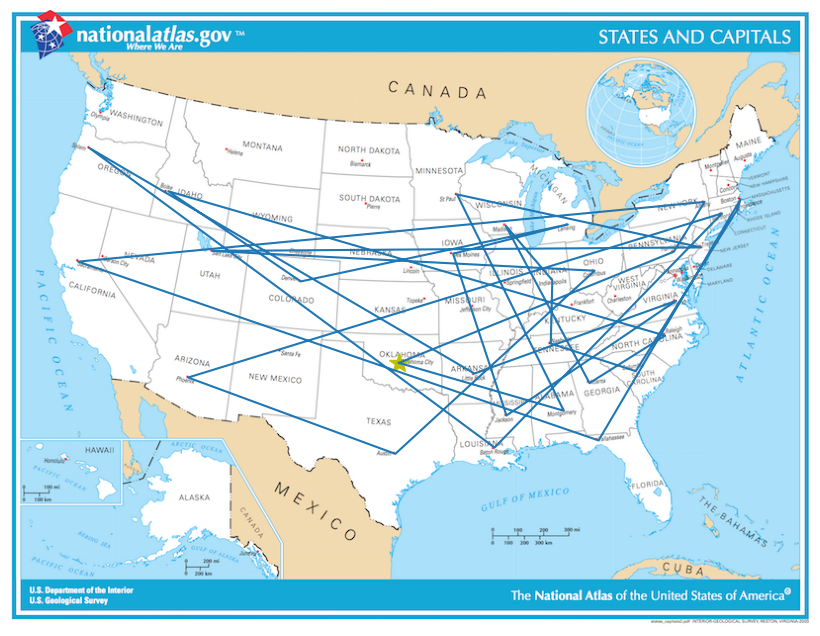

In [7]:
def visualize_path(coordinates, starting_city, w=12, h=8):
	x, y = list(zip(*coordinates))
	_, (x0, y0) = starting_city
	us_map = mpimg.imread("map.png")
	plt.imshow(us_map)
	plt.plot(x0, y0, 'y*', markersize=15)
	plt.plot(x + x[:1], y + y[:1])
	plt.axis("off")
	fig = plt.gcf()
	fig.set_size_inches([w, h])
	
num_cities = 30
shuffle = False
# capitals_tsp = TSP()
with open('capitals.json', 'r') as capitals_file:
	capitals_dict = json.load(capitals_file)
	capitals_list = [(k, tuple(v)) for k, v in capitals_dict.items()]
	# print(capitals_list)

	
capitals_tsp = TSP(capitals_list[:num_cities], shuffle=shuffle)
starting_city = capitals_tsp.path[0]
print(f"Initial path value: {-capitals_tsp.utility:.2f}")
print(capitals_tsp.path)
# show_path(capitals_tsp.coordinates, starting_city)
visualize_path(capitals_tsp.coordinates, starting_city)

In [9]:
class HillClimbingSolver:
	def __init__(self, iterations=100):
		self.epochs = iterations
		
	def solve(self, problem):
		iterations_completed = 0
		current = problem.copy(shuffle=True)
		while iterations_completed < self.epochs:
			# get the list of successors
			print(f"\nNew iteration #{iterations_completed + 1}")
			print(f"current path = {current.utility}")
			successor_list = current.successors()
			# find the max-utility successor
			if len(successor_list) == 0:
				break
			max_successor = successor_list[0]
			for successor in successor_list:
				if successor.utility > max_successor.utility:
					max_successor = successor
			 
			print(f"Found max-utility successor: {max_successor.utility}")
			# compare with the current best
			# if not better then break
			# otherwise, continue the loop, update the current best
			if max_successor.utility > current.utility:
				current = max_successor
			else:
				break
			iterations_completed += 1
		return current
		


New iteration #1
current path = -8012.768201979209
Found max-utility successor: -6307.719778617048

New iteration #2
current path = -6307.719778617048
Found max-utility successor: -5302.101252580702

New iteration #3
current path = -5302.101252580702
Found max-utility successor: -4742.16997948216

New iteration #4
current path = -4742.16997948216
Found max-utility successor: -4408.102966584869

New iteration #5
current path = -4408.102966584869
Found max-utility successor: -4101.260578054439

New iteration #6
current path = -4101.260578054439
Found max-utility successor: -3904.6693413292287

New iteration #7
current path = -3904.6693413292287
Found max-utility successor: -3709.7265418201014

New iteration #8
current path = -3709.7265418201014
Found max-utility successor: -3472.8262645693167

New iteration #9
current path = -3472.8262645693167
Found max-utility successor: -3289.346436243213

New iteration #10
current path = -3289.346436243213
Found max-utility successor: -3142.41535066

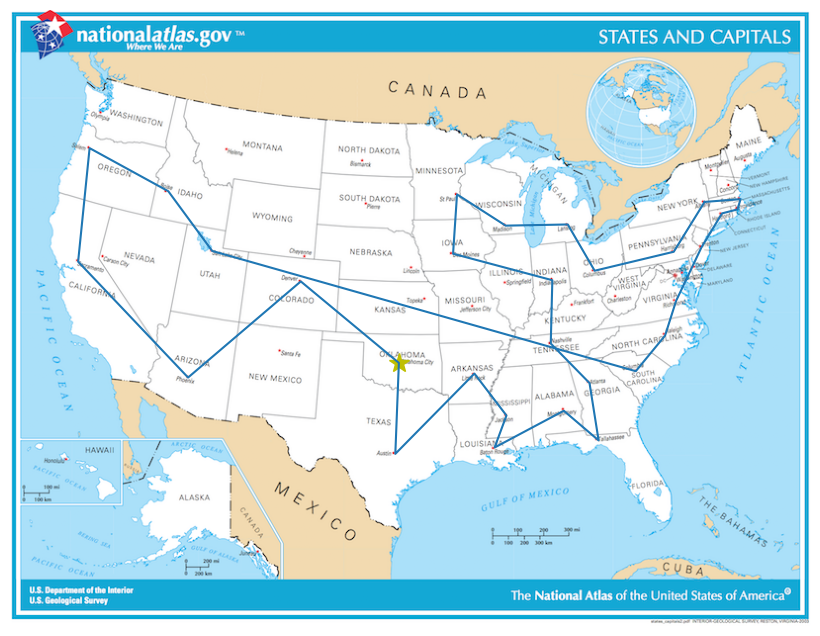

In [11]:
solver = HillClimbingSolver(iterations=35)
start_time = time.perf_counter()
result = solver.solve(capitals_tsp)
stop_time = time.perf_counter()
print(f"solution time {(stop_time-start_time)*1000:.2f} milliseconds")
print(f"Initial path length: {-capitals_tsp.utility:.2f}")
print(f"Final path length: {-result.utility:.2f}")
print(result.path)
visualize_path(result.coordinates, starting_city)

In [12]:
# Local beam search
# like hill-climbing 
# but begin with k randomly generated states
# at each step, select k best successors from all the neighbors of all k states, then repeats
class LocalBeamSolver:
	def __init__(self, k=5, iterations=50):
		self.k_param = k
		self.iterations = iterations
	
	def solve(self, prob):
		# current_list - generate k random states
		current_list = []
		for i in range(self.k_param):
			current_list.append(prob.copy(shuffle=True))
		iteration_count = 0
		while iteration_count < self.iterations:
			print(f"\nAt iteration {iteration_count+1}")
			for i in range(self.k_param):
				print(f"{current_list[i].utility}")
			# generate all neighbors of states that are in the current_list
			better_neighbors = []
			for state in current_list:
				for successor in state.successors():
					if successor.utility > state.utility:
						better_neighbors.append(successor)
			# if there are no better neighbors, then just get the max in current list
			if len(better_neighbors)==0:
				break
			# get the list of k best successors among all neighbors (if there are fewer than k successors, then select all)
			better_neighbors.sort(key=lambda path: path.utility, reverse=True)
			new_current_list_size = min(self.k_param, len(better_neighbors))
			# update the current_list
			# and update iteration_count
			current_list = better_neighbors[:new_current_list_size]
			iteration_count += 1
		
		current_list.sort(key=lambda path: path.utility, reverse=True)
		return current_list[0]
		
			
			
		


At iteration 1
-8093.848332868799
-7583.095312754234
-7360.469048855018
-6517.1264744688615
-8238.937309176637
-8196.579846825312
-7868.890080101015
-8123.85763816971
-8043.101019294214
-7290.970645996541

At iteration 2
-5661.206931570279
-5676.666114179228
-5848.353817954866
-5952.665147532832
-5953.348791058837
-5974.945681701565
-5990.601219063584
-5997.513752720866
-5998.718862018262
-6042.1950448947155

At iteration 3
-5134.681676165001
-5134.681676165001
-5150.14085877395
-5150.14085877395
-5216.565831528732
-5235.411550180487
-5270.32743291512
-5284.201786654148
-5284.99579291959
-5297.688940867848

At iteration 4
-4743.8021775098405
-4743.8021775098405
-4743.8021775098405
-4757.67653124887
-4757.67653124887
-4757.67653124887
-4758.470537514311
-4758.470537514311
-4758.470537514311
-4783.10811187671

At iteration 5
-4351.337849984761
-4351.337849984761
-4351.337849984761
-4351.337849984761
-4351.337849984761
-4351.337849984761
-4381.871776780466
-4381.871776780466
-4381.871776

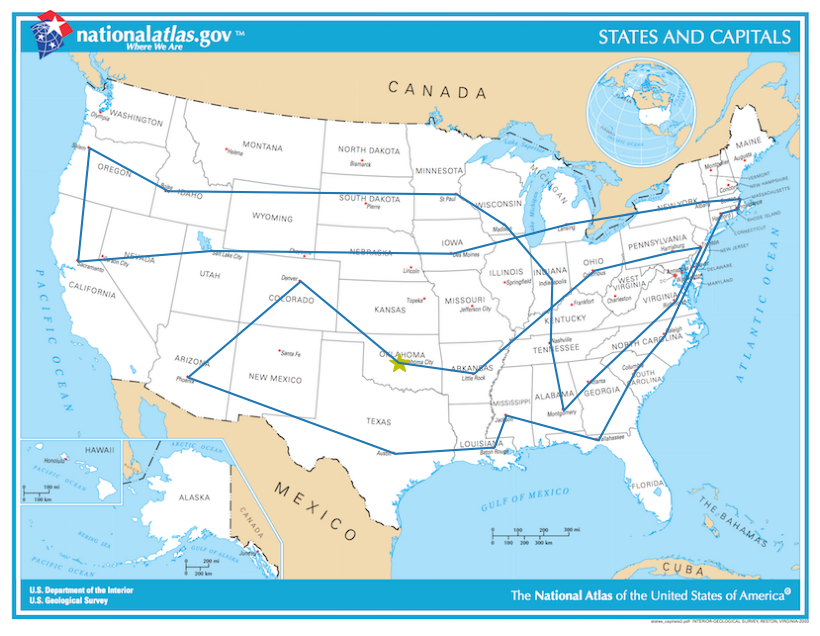

In [13]:
solver = LocalBeamSolver(k=10, iterations=75)
start_time = time.perf_counter()
result = solver.solve(capitals_tsp)
stop_time = time.perf_counter()
print(f"solving time: {(stop_time - start_time)*1000} millisecs")
print(f"Initial path length: {-capitals_tsp.utility:.2f}")
print(f"Final path length: {-result.utility:.2f}")
print(result.path)
visualize_path(result.coordinates, starting_city)

In [16]:
# Simulated annealing
class SimulatedAnnealingSolver:
	
	def __init__(self, alpha=0.95, initial_temperature=1e6):
		self.alpha = alpha
		self.initial_temperature = initial_temperature
		self.cutoff_temperature = 1e-8
		
	def schedule(self, time):
		return self.initial_temperature * (self.alpha ** time)
	
	def solve(self, prob):
		import random, math
		time = 0
		current = prob
		step_count = 0
		temperature = self.initial_temperature
		while temperature > self.cutoff_temperature:
			# get the temperature
			time += 1
			temperature = self.schedule(time)
			# generate a random successor
			rand_successor = random.choice(current.successors())
			# compute delta_E
			delta_E = rand_successor.utility - current.utility
			# if delta_E positive, then update current
			if delta_E > 0:
				current = rand_successor
			# else accept it with prob
			else:
				acceptance_prob = math.exp(delta_E/temperature)
				if random.random() < acceptance_prob:
					current = rand_successor
			if step_count % 500 == 0:
				print(f"\nAt step #{step_count + 1}")
				print(f"temperature = {temperature:.2f}")
				print(f"Path length: {current.utility}")
			
			step_count += 1
		return current	
		


At step #1
temperature = 99500000.00
Path length: -8088.6428397250875

At step #501
temperature = 8116400.21
Path length: -7095.660134049381

At step #1001
temperature = 662069.87
Path length: -7337.456276770065

At step #1501
temperature = 54006.27
Path length: -8147.433819510623

At step #2001
temperature = 4405.39
Path length: -8099.240132665542

At step #2501
temperature = 359.36
Path length: -6506.760522078097

At step #3001
temperature = 29.31
Path length: -4028.0561629486892

At step #3501
temperature = 2.39
Path length: -3115.750019882112

At step #4001
temperature = 0.20
Path length: -2990.852736898769

At step #4501
temperature = 0.02
Path length: -2867.605844933428

At step #5001
temperature = 0.00
Path length: -2833.7467483789187

At step #5501
temperature = 0.00
Path length: -2728.4271120011636

At step #6001
temperature = 0.00
Path length: -2594.976374353515

At step #6501
temperature = 0.00
Path length: -2575.4733063531994

At step #7001
temperature = 0.00
Path length: 

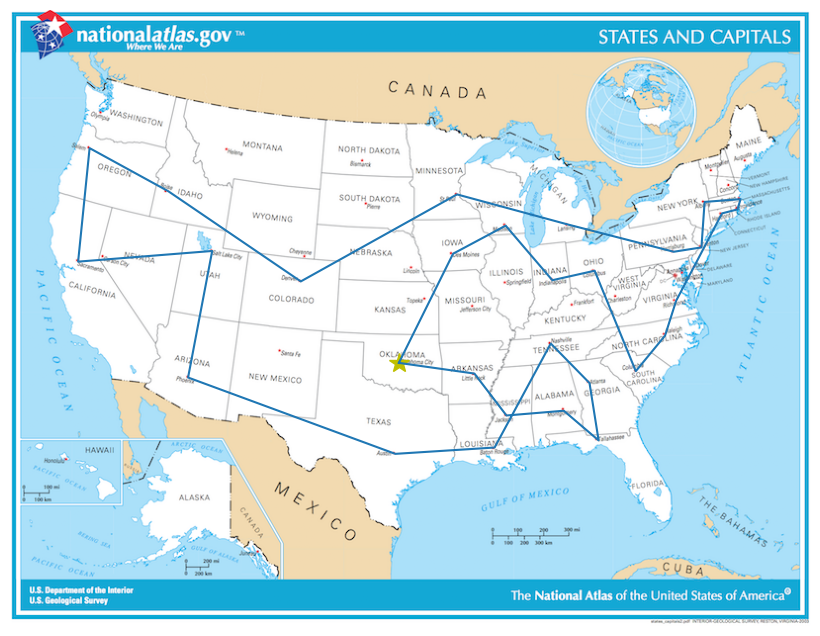

In [19]:
solver = SimulatedAnnealingSolver(alpha=.995, initial_temperature=1e8)
start_time = time.perf_counter()
result = solver.solve(capitals_tsp)
stop_time = time.perf_counter()
print(f"solving time: {(stop_time - start_time)*1000} millisecs")
print(f"Initial path length: {-capitals_tsp.utility:.2f}")
print(f"Final path length: {-result.utility:.2f}")
print(result.path)
visualize_path(result.coordinates, starting_city)